# EAC downstream relative vortcity and buoyancy frequency 

## Downstream relative vorticity (whole, mean + variability)
\begin{equation}
\begin{aligned}
&\overline{\textbf{u}\cdot\nabla \zeta}\
&=\overline{\textbf{u}\cdot\nabla(\frac{\partial v}{\partial x}-\frac{\partial u}{\partial y})}
\end{aligned}
\end{equation}

## Downstream relative vorticity (mean)
\begin{equation}
\overline{\textbf{u}}\cdot\nabla\overline{\zeta}=\overline{\textbf{u}}\cdot \nabla\overline{\frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}}
\end{equation}

## Downstream relative vorticity (variability)
\begin{equation}
\overline{\textbf{u'}\cdot\nabla\zeta '} = \overline{\textbf{u}\cdot\nabla\zeta}-\overline{\textbf{u}}\cdot\nabla\overline{\zeta}
\end{equation}

In [2]:
RV_dstm_w_xr=xr.open_dataarray('RV_dstm_whole')
RV_mean=xr.open_dataarray('RV_mean')
RV_dstm=xr.open_dataarray('RV_ds_mean')
dsRV_var=xr.open_dataarray('RV_ds_var')

In [ ]:
buofre_ds_whole=xr.open_dataarray('bf_ds_whole')
bf_mean_xr=xr.open_dataarray('meanbuofre')
buofre_ds_mean=xr.open_dataarray('buofre_ds_mean')
buofre_ds_var=xr.open_dataarray('buofre_ds_var')

In [16]:
#RV_dstm_w_xr.to_netcdf('RV_dstm_whole')
#RV_mean.to_netcdf('RV_mean')
#RV_dstm.to_netcdf('RV_ds_mean')
#dsRV_var.to_netcdf('RV_ds_var')

In [40]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import cartopy
import cartopy.crs as ccrs
import pandas as pd
import copy
import math
import matplotlib
from collections import OrderedDict
import IPython.display
# import seaborn as sns
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook
import IPython.display
import cmocean as cm
from scipy.io import loadmat
from dask.distributed import Client
import cartopy.crs as ccrs
import cartopy.feature as cft
import matplotlib.ticker as mticker
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
#print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

In [3]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    #plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [4]:
# for plot
land = cft.NaturalEarthFeature('physical','land','110m',edgecolor='black',facecolor='gray',linewidth=0.5)

font={'family':'normal',
     'weight':'bold',
     'size':16}
matplotlib.rc('font',**font)

In [8]:
region=[145-360,174-360,-48,-20]
eacx=slice(145-360,174-360)
eacy=slice(-48,-20)

In [5]:
ekey='01deg'
expt=exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

In [6]:
def input_vel(ts,te):
    u=cc.get_nc_variable(expt,'ocean.nc','u',use_cache=True,
                                 n=n_files,time_units=time_units,offset=offset)\
                                 .sel(xu_ocean=eacx)\
                                 .sel(yu_ocean=eacy)\
                                 .sel(time=slice(ts,te))
    v=cc.get_nc_variable(expt,'ocean.nc','v',use_cache=True,
                                     n=n_files,time_units=time_units,offset=offset)\
                                     .sel(xu_ocean=eacx)\
                                     .sel(yu_ocean=eacy)\
                                     .sel(time=slice(ts,te))
    return u,v

In [21]:
#ekey='01deg'
def rv(u,v,t):
    u=u.sel(time=t)
    v=v.sel(time=t)
    u=xr.DataArray.squeeze(u)
    v=xr.DataArray.squeeze(v)
    #grid = xr.open_dataset('/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/output120/ocean/ocean_grid.nc')
    dxt=grid.dxt.sel(xt_ocean=eacx)\
            .sel(yt_ocean=eacy)
    dyt=grid.dyt.sel(xt_ocean=eacx)\
            .sel(yt_ocean=eacy)
    dxtnew=dxt[1:-1,0:-1]
    dytnew=dyt[1:-1,0:-1]
    dx3d=np.tile(dxtnew,[zsize,1,1])
    dy3d=np.tile(dytnew,[zsize,1,1])
    
    du=u.values[:,1:,:]-u.values[:,0:-1,:]
    du_mean=1/2*(du[:,:,1:]+du[:,:,0:-1])
    dv=v.values[:,:,1:]-v.values[:,:,0:-1]
    dv_mean=1/2*(dv[:,1:,:]+dv[:,0:-1,:])
    
    dv_dx=dv_mean/dx3d
    du_dy=du_mean/dy3d
    zeta=dv_dx-du_dy
    RV=xr.DataArray(zeta,coords=[u['st_ocean'],dxt['yt_ocean'][1:-1],dxt['xt_ocean'][0:-1]])
    return RV

## Downstream RV, whole (1999-2009)
$\overline{\textbf{u}\cdot\nabla \zeta}$

In [13]:
ts='1999-01-01'
te='2009-01-01'

In [14]:
u,v=input_vel(ts,te)

Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_u_None_days-since-0001-01-01_None_False.pkl
Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_v_None_days-since-0001-01-01_None_False.pkl


In [67]:
xsize=u.xu_ocean.shape[0]
ysize=u.yu_ocean.shape[0]
zsize=u.st_ocean.shape[0]
grid = xr.open_dataset('/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/output120/ocean/ocean_grid.nc')
dxu=grid.dxu.sel(xu_ocean=eacx)\
            .sel(yu_ocean=eacy)
dyu=grid.dyu.sel(xu_ocean=eacx)\
            .sel(yu_ocean=eacy)
dxunew=dxu[:,1:-1]
dxdx=dxunew.values[:,0:-1]+dxunew.values[:,1:]
dx_mean=1/2*(dxdx[0:-1,:]+dxdx[1:,:])
dx3d=np.tile(dx_mean,[zsize,1,1])

dyunew=dyu.values[1:-1,:]
dydy=dyunew[0:-1,:]+dyunew[1:,:]
dy_mean=1/2*(dydy[:,0:-1]+dydy[:,1:])
dy_3d=np.tile(dy_mean,[zsize,1,1])
RV_dstm_w=np.zeros([zsize,ysize-3,xsize-3])
T=u.time.values
for i in T:
    print('computing',str(i))
    u1=u.sel(time=i)
    v1=v.sel(time=i)
    unew=u1.values[:,:,1:-1]
    RV=rv(u,v,i)
    dzeta=RV.values[:,:,2:]-RV.values[:,:,0:-2]
    dzeta_dx=dzeta/dx3d
    uu=1/2*(unew[:,1:,:]+unew[:,0:-1,:])
    uu_mean=1/2*(uu[:,:,1:]+uu[:,:,0:-1])
    URV_xg=xr.DataArray(uu_mean*dzeta_dx,coords=[RV['st_ocean'],RV['yt_ocean'],RV['xt_ocean'][1:-1]])
    
    vnew=v1.values[:,1:-1,:]
    dzetay=RV.values[:,2:,:]-RV.values[:,0:-2,:]
    vv=1/2*(vnew[:,0:-1,:]+vnew[:,1:,:])
    v_mean=1/2*(vv[:,:,0:-1]+vv[:,:,1:])
    VRV_yg=xr.DataArray(v_mean*dzetay/dy_3d,coords=[RV['st_ocean'],RV['yt_ocean'][1:-1],RV['xt_ocean']])
    
    RV_dstm=VRV_yg+URV_xg
    RV_dstm_w=RV_dstm_w+RV_dstm.values/len(T)
    
RV_dstm_w_xr=xr.DataArray(RV_dstm_w,coords=RV_dstm.coords)
    

Text(0.5, 1.0, 'whole donstream RV at 154 E')

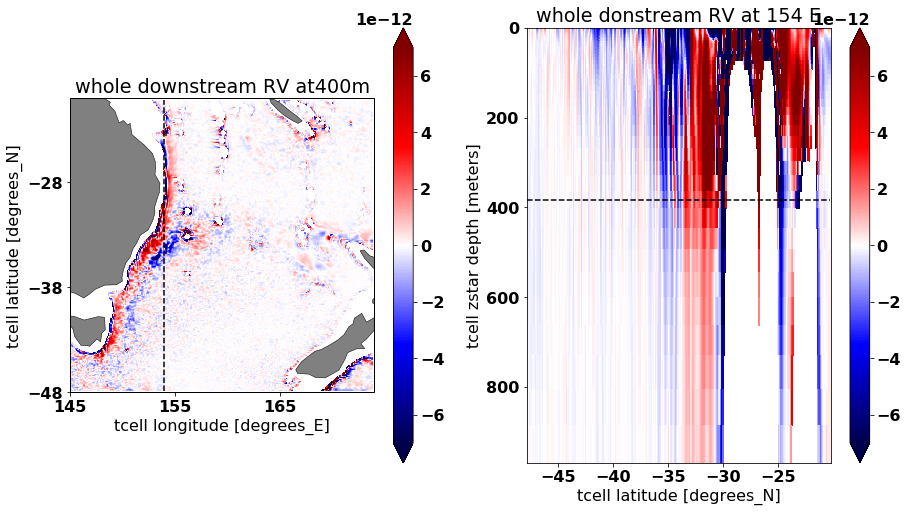

In [48]:
d=400
y=RV_dstm_w_xr.yt_ocean.values
x1=RV_dstm_w_xr.sel(xt_ocean=154-360,method='nearest').xt_ocean.values+360
y1=RV_dstm_w_xr.sel(st_ocean=d,method='nearest').st_ocean.values
fig=plt.figure(figsize=(15,8))
ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
ax.add_feature(land)
ax.set_extent(region,crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(eacx.start,eacx.stop+1,10)+360,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(eacy.start,eacy.stop+1,10),crs=ccrs.PlateCarree())
RV_dstm_w_xr.sel(st_ocean=d,method='nearest').plot(vmin=-7e-12,vmax=7e-12,cmap='seismic')
plt.plot(np.tile(x1,len(y)),y,'k--')
plt.title('whole downstream RV at'+str(d)+'m')


ax=plt.subplot(1,2,2)
RV_dstm_w_xr.sel(xt_ocean=154-360,method='nearest').sel(st_ocean=slice(0,1000))\
            .plot(x='yt_ocean',y='st_ocean',vmin=-7e-12,vmax=7e-12,cmap='seismic',yincrease=False)
plt.plot(y,np.tile(y1,len(y)),'k--')
plt.title('whole donstream RV at 154 E')

In [7]:
#save variable
RV_dstm_w_xr.to_netcdf('RV_dstm_whole')

## downstream RV, mean flow
$\overline{\textbf{u}}\cdot\nabla\overline{\zeta}$

In [49]:
ubar=u.mean('time')
vbar=v.mean('time')

In [68]:
T=u.time.values
RV_bar=np.zeros([zsize,ysize-1,xsize-1])
for i in T:
    print('computing',str(i))
    RV=rv(u,v,i)
    RV_bar=RV_bar+RV.values/len(T)
RV_mean=xr.DataArray(RV_bar,coords=RV.coords)

In [11]:
RV_mean.to_netcdf('RV_mean')

In [53]:
unew=ubar.values[:,:,1:-1]
dzeta=RV_mean.values[:,:,2:]-RV_mean.values[:,:,0:-2]
dzeta_dx=dzeta/dx3d
uu=1/2*(unew[:,1:,:]+unew[:,0:-1,:])
uu_mean=1/2*(uu[:,:,1:]+uu[:,:,0:-1])
URV_xg=xr.DataArray(uu_mean*dzeta_dx,coords=[RV['st_ocean'],RV['yt_ocean'],RV['xt_ocean'][1:-1]])

vnew=vbar.values[:,1:-1,:]
dyunew=dyu.values[1:-1,:]
dzetay=RV_mean.values[:,2:,:]-RV_mean.values[:,0:-2,:]
dydy=dyunew[0:-1,:]+dyunew[1:,:]
dy_mean=1/2*(dydy[:,0:-1]+dydy[:,1:])
vv=1/2*(vnew[:,0:-1,:]+vnew[:,1:,:])
v_mean=1/2*(vv[:,:,0:-1]+vv[:,:,1:])
dy_3d=np.tile(dy_mean,[75,1,1])
VRV_yg=xr.DataArray(v_mean*dzetay/dy_3d,coords=[RV['st_ocean'],RV['yt_ocean'][1:-1],RV['xt_ocean']])
RV_dstm=VRV_yg+URV_xg

In [13]:
RV_dstm.to_netcdf('RV_ds_mean')

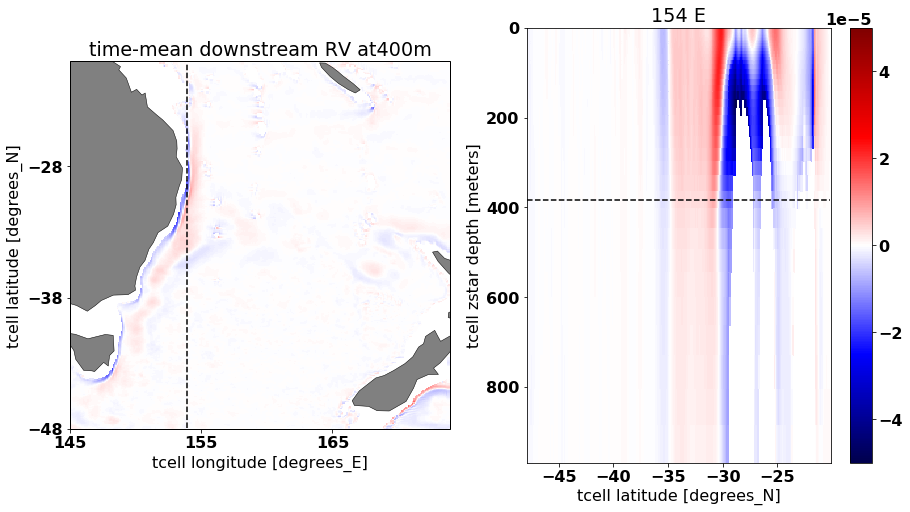

In [61]:
d=400
y=RV_mean.yt_ocean.values
x1=RV_mean.sel(xt_ocean=154-360,method='nearest').xt_ocean.values+360
y1=RV_mean.sel(st_ocean=d,method='nearest').st_ocean.values
fig=plt.figure(figsize=(15,8))
ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
ax.add_feature(land)
ax.set_extent(region,crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(eacx.start,eacx.stop+1,10)+360,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(eacy.start,eacy.stop+1,10),crs=ccrs.PlateCarree())
RV_mean.sel(st_ocean=d,method='nearest').plot(vmin=-5e-5,vmax=5e-5,cmap='seismic',add_colorbar=False)
plt.plot(np.tile(x1,len(y)),y,'k--')
plt.title('time-mean downstream RV at'+str(d)+'m')


ax=plt.subplot(1,2,2)
p1=RV_mean.sel(xt_ocean=154-360,method='nearest').sel(st_ocean=slice(0,1000))\
            .plot(x='yt_ocean',y='st_ocean',vmin=-5e-5,vmax=5e-5,cmap='seismic',yincrease=False,add_colorbar=False)
plt.plot(y,np.tile(y1,len(y)),'k--')
plt.title('154 E')

cb=plt.colorbar(p1)
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()

In [62]:
dsRV_var=RV_dstm_w_xr-RV_dstm

In [6]:
dsRV_var.to_netcdf('RV_ds_var')

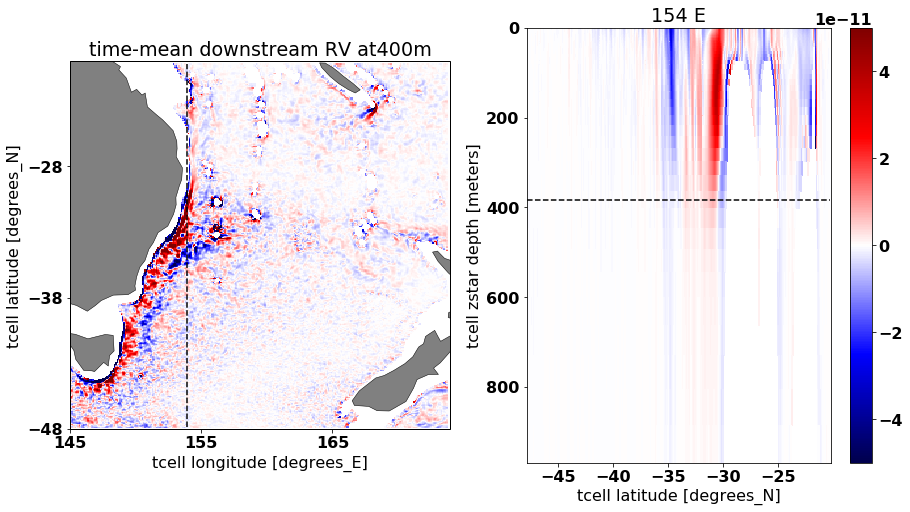

In [66]:
d=400
y=dsRV_var.yt_ocean.values
x1=dsRV_var.sel(xt_ocean=154-360,method='nearest').xt_ocean.values+360
y1=dsRV_var.sel(st_ocean=d,method='nearest').st_ocean.values
fig=plt.figure(figsize=(15,8))
ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
ax.add_feature(land)
ax.set_extent(region,crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(eacx.start,eacx.stop+1,10)+360,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(eacy.start,eacy.stop+1,10),crs=ccrs.PlateCarree())
dsRV_var.sel(st_ocean=d,method='nearest').plot(vmin=-5e-12,vmax=5e-12,cmap='seismic',add_colorbar=False)
plt.plot(np.tile(x1,len(y)),y,'k--')
plt.title('time-mean downstream RV at'+str(d)+'m')


ax=plt.subplot(1,2,2)
p1=dsRV_var.sel(xt_ocean=154-360,method='nearest').sel(st_ocean=slice(0,1000))\
            .plot(x='yt_ocean',y='st_ocean',vmin=-5e-11,vmax=5e-11,cmap='seismic',yincrease=False,add_colorbar=False)
plt.plot(y,np.tile(y1,len(y)),'k--')
plt.title('154 E')

cb=plt.colorbar(p1)
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()

## Down stream buoyancy frequency

## Downstream buoyancy frequency(whole=mean flow+variability)
\begin{equation}
\begin{aligned}
&\overline{\textbf{u}\cdot\nabla(\frac{\partial \rho}{\partial z})}\
=&\overline{u\frac{\partial}{\partial x}(\frac{\partial \rho}{\partial z})+v\frac{\partial}{\partial y}(\frac{\partial \rho}{\partial z})}
\end{aligned}
\end{equation}

## Downstream buoyancy frequency (mean flow)
\begin{equation}
\begin{aligned}
&\overline{\textbf{u}}\cdot\nabla\overline{\frac{\partial \rho}{\partial z}}\
=&\overline{u}\frac{\partial}{\partial x}\overline{\frac{\partial \rho}{\partial z}}+\overline{v}\frac{\partial}{\partial y}\overline{\frac{\partial \rho}{\partial z}}
\end{aligned}
\end{equation}

## Downstream buoyancy frequency (variability)
\begin{equation}
\begin{aligned}
&\textbf{u}'\cdot\nabla (\frac{\partial \rho}{\partial z})'\
=&\overline{\textbf{u}\cdot\nabla(\frac{\partial \rho}{\partial z})}
\end{aligned}-\overline{\textbf{u}}\cdot\nabla\overline{\frac{\partial \rho}{\partial z}}
\end{equation}

In [23]:
ts='1999-01-01'
te='2009-01-01'
u,v=input_vel(ts,te)
rho=cc.get_nc_variable(expt,'ocean.nc','pot_rho_2',use_cache=True,
                                 n=n_files,time_units=time_units,offset=offset)\
                                 .sel(xt_ocean=eacx)\
                                 .sel(yt_ocean=eacy).sel(time=slice(ts,te))

Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_u_None_days-since-0001-01-01_None_False.pkl
Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_v_None_days-since-0001-01-01_None_False.pkl
Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_pot_rho_2_None_days-since-0001-01-01_None_False.pkl


In [14]:
xsize=rho.xt_ocean.shape[0]
ysize=rho.yt_ocean.shape[0]
zsize=rho.st_ocean.shape[0]
grid = xr.open_dataset('/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/output120/ocean/ocean_grid.nc')
dxu=grid.dxu.sel(xu_ocean=eacx)\
            .sel(yu_ocean=eacy)
dxunew=dxu[:,1:]
dxdx=dxunew.values[:,1:,]+dxunew.values[:,0:-1]
dx_mean=1/2*(dxdx[1:,:]+dxdx[0:-1,:])
dx3d=np.tile(dx_mean,[zsize-1,1,1])

dyu=grid.dyu.sel(xu_ocean=eacx)\
            .sel(yu_ocean=eacy)
dydy=dyu.values[1:,:]+dyu.values[0:-1,:]
dy_mean=1/2*(dydy[:,1:]+dydy[:,0:-1])
dy_3d=np.tile(dy_mean,[zsize-1,1,1])

In [17]:
def buofre(rho,time):
    z=rho['st_ocean'].values
    dz=z[1:]-z[0:-1]
    dz3d=np.tile(dz,(ysize,xsize,1))
    dz3dd=np.transpose(dz3d,(2,0,1))
    rho1=rho.sel(time=time)
    drho=rho1.values[0:-1,:,:]-rho1.values[1:,:,:]
    drho_dz=drho/dz3dd
    buofre=xr.DataArray(drho_dz,coords=[rho['st_ocean'][0:-1],rho['yt_ocean'],rho['xt_ocean']])
    return buofre

In [29]:
##whole downstream buoyancy freqency
T=rho.time.values
buofre_ds_whole=np.zeros([zsize-1,ysize-2,xsize-2])
for i in T:
    print('computing',str(i))
    u1=u.sel(time=i)
    u1new=u1[0:-1,:,1:]
    uu=1/2*(u1new.values[:,0:-1,:]+u1new.values[:,1:,:])
    uu_mean=1/2*(uu[:,:,0:-1]+uu[:,:,1:])
    
    v1=v.sel(time=i)
    v1new=v1.values[0:-1,:,:]
    vv=1/2*(v1new[:,0:-1,:]+v1new[:,1:,:])
    v_mean=1/2*(vv[:,:,0:-1]+vv[:,:,0:-1])
    
    bf=buofre(rho,i)
    
    bfx=bf[:,1:-1,:]
    dbx=bfx.values[:,:,2:]-bfx.values[:,:,0:-2]
    dbx_dx=dbx/dx3d
    bf_xg=xr.DataArray(uu_mean*dbx/dx3d,coords=[bf['st_ocean'],bf['yt_ocean'][1:-1],bf['xt_ocean'][1:-1]])
    
    bfy=bf[:,:,0:-1]
    dbfy=bfy.values[:,2:,:]-bfy.values[:,0:-2,:]
    bf_yg=xr.DataArray(v_mean*dbfy/dy_3d,coords=[bf['st_ocean'],bf['yt_ocean'][1:-1],bf['xt_ocean'][0:-1]])
    buofre_ds=bf_yg+bf_xg
    buofre_ds_whole=buofre_ds_whole+buofre_ds.values/len(T)
buofre_ds_whole_xr=xr.DataArray(buofre_ds_whole,coords=buofre_ds.coords)

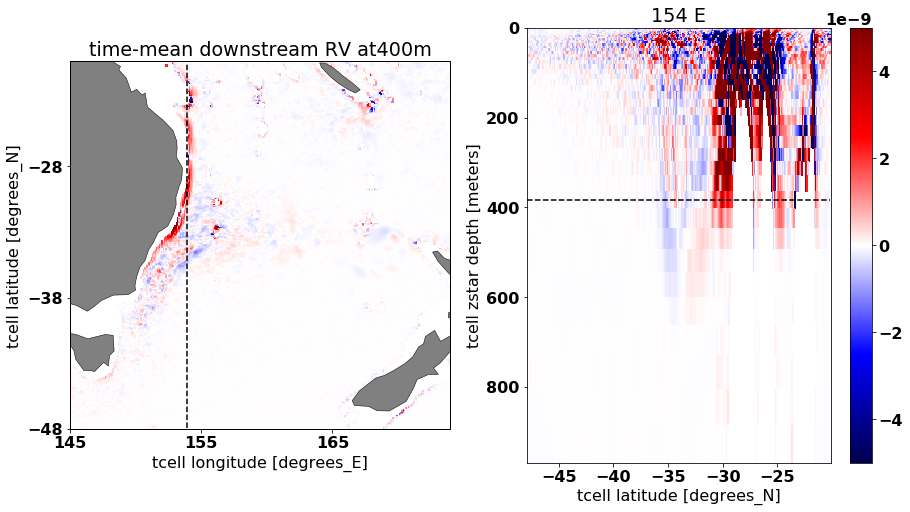

In [28]:
d=400
y=buofre_ds_whole_xr.yt_ocean.values
x1=buofre_ds_whole_xr.sel(xt_ocean=154-360,method='nearest').xt_ocean.values+360
y1=buofre_ds_whole_xr.sel(st_ocean=d,method='nearest').st_ocean.values
fig=plt.figure(figsize=(15,8))
ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
ax.add_feature(land)
ax.set_extent(region,crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(eacx.start,eacx.stop+1,10)+360,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(eacy.start,eacy.stop+1,10),crs=ccrs.PlateCarree())
buofre_ds_whole_xr.sel(st_ocean=d,method='nearest').plot(cmap='seismic',add_colorbar=False,vmin=-5e-9,vmax=5e-9)
plt.plot(np.tile(x1,len(y)),y,'k--')
plt.title('time-mean downstream RV at'+str(d)+'m')


ax=plt.subplot(1,2,2)
p1=buofre_ds_whole_xr.sel(xt_ocean=154-360,method='nearest').sel(st_ocean=slice(0,1000))\
            .plot(x='yt_ocean',y='st_ocean',cmap='seismic',yincrease=False,add_colorbar=False,vmin=-5e-9,vmax=5e-9)
plt.plot(y,np.tile(y1,len(y)),'k--')
plt.title('154 E')

cb=plt.colorbar(p1)
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()

In [32]:
#time-mean downstream bouyancy frequency
ubar=u.mean('time')
vbar=v.mean('time')
z=rho['st_ocean'].values
dz=z[1:]-z[0:-1]
dz3d=np.tile(dz,(ysize,xsize,1))
dz3dd=np.transpose(dz3d,(2,0,1))
rho1=rho.mean('time')
drho=rho1.values[0:-1,:,:]-rho1.values[1:,:,:]
drho_dz=drho/dz3dd
buofre_mean_xr=xr.DataArray(drho_dz,coords=[rho['st_ocean'][0:-1],rho['yt_ocean'],rho['xt_ocean']])

In [35]:
ubarnew=ubar[0:-1,:,1:]
uu=1/2*(ubarnew.values[:,0:-1,:]+ubarnew.values[:,1:,:])
uu_mean=1/2*(uu[:,:,0:-1]+uu[:,:,1:])

vbarnew=vbar.values[0:-1,:,:]
vv=1/2*(vbarnew[:,0:-1,:]+vbarnew[:,1:,:])
v_mean=1/2*(vv[:,:,0:-1]+vv[:,:,0:-1])

bfx=buofre_mean_xr[:,1:-1,:]
dbx=bfx.values[:,:,2:]-bfx.values[:,:,0:-2]
dbx_dx=dbx/dx3d
bf_xg=xr.DataArray(uu_mean*dbx/dx3d,coords=[buofre_mean_xr['st_ocean'],
                                            buofre_mean_xr['yt_ocean'][1:-1],
                                            buofre_mean_xr['xt_ocean'][1:-1]])
    
bfy=buofre_mean_xr[:,:,0:-1]
dbfy=bfy.values[:,2:,:]-bfy.values[:,0:-2,:]
bf_yg=xr.DataArray(v_mean*dbfy/dy_3d,coords=[buofre_mean_xr['st_ocean'],
                                             buofre_mean_xr['yt_ocean'][1:-1],
                                             buofre_mean_xr['xt_ocean'][0:-1]])
buofre_ds_mean=bf_yg+bf_xg

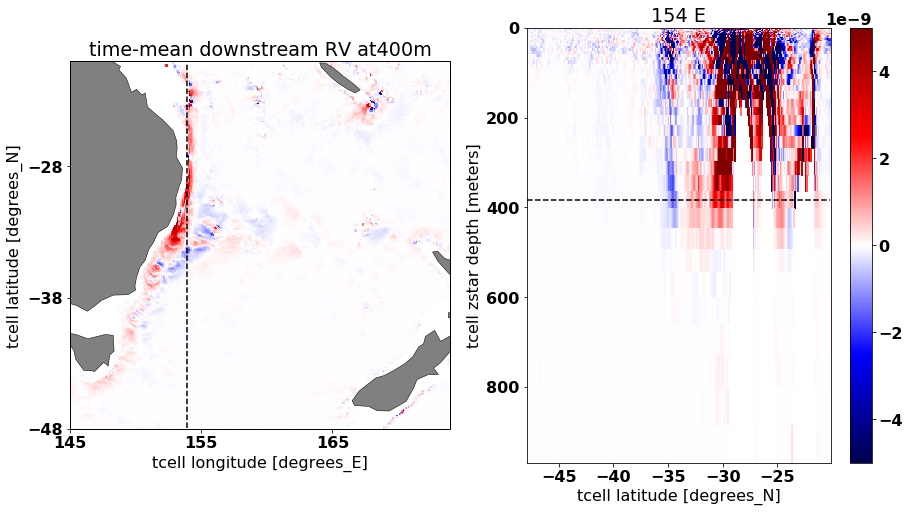

In [37]:
d=400
y=buofre_ds_mean.yt_ocean.values
x1=buofre_ds_mean.sel(xt_ocean=154-360,method='nearest').xt_ocean.values+360
y1=buofre_ds_mean.sel(st_ocean=d,method='nearest').st_ocean.values
fig=plt.figure(figsize=(15,8))
ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
ax.add_feature(land)
ax.set_extent(region,crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(eacx.start,eacx.stop+1,10)+360,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(eacy.start,eacy.stop+1,10),crs=ccrs.PlateCarree())
buofre_ds_mean.sel(st_ocean=d,method='nearest').plot(cmap='seismic',add_colorbar=False,vmin=-5e-9,vmax=5e-9)
plt.plot(np.tile(x1,len(y)),y,'k--')
plt.title('time-mean downstream RV at'+str(d)+'m')


ax=plt.subplot(1,2,2)
p1=buofre_ds_mean.sel(xt_ocean=154-360,method='nearest').sel(st_ocean=slice(0,1000))\
            .plot(x='yt_ocean',y='st_ocean',cmap='seismic',yincrease=False,add_colorbar=False,vmin=-5e-9,vmax=5e-9)
plt.plot(y,np.tile(y1,len(y)),'k--')
plt.title('154 E')

cb=plt.colorbar(p1)
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()

In [38]:
# variability
buofre_var=buofre_ds_whole-buofre_ds_mean

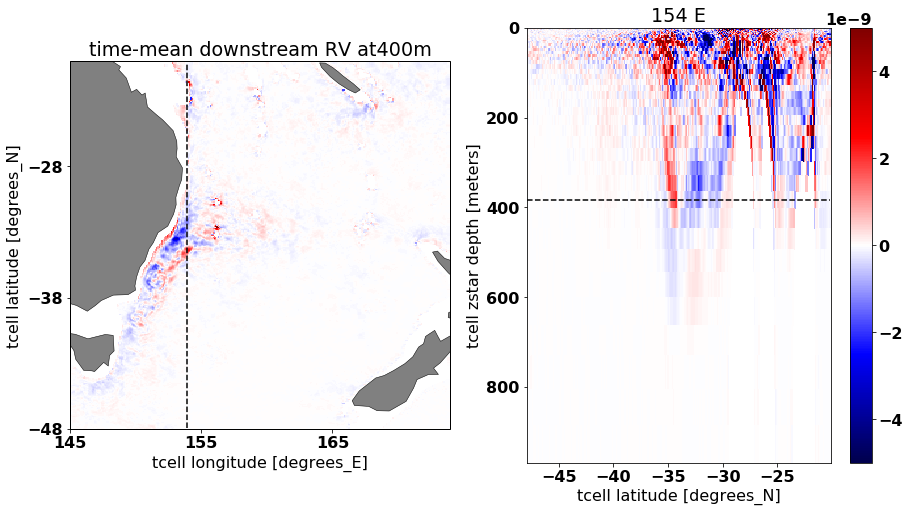

In [39]:
d=400
y=buofre_var.yt_ocean.values
x1=buofre_var.sel(xt_ocean=154-360,method='nearest').xt_ocean.values+360
y1=buofre_var.sel(st_ocean=d,method='nearest').st_ocean.values
fig=plt.figure(figsize=(15,8))
ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
ax.add_feature(land)
ax.set_extent(region,crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(eacx.start,eacx.stop+1,10)+360,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(eacy.start,eacy.stop+1,10),crs=ccrs.PlateCarree())
buofre_var.sel(st_ocean=d,method='nearest').plot(cmap='seismic',add_colorbar=False,vmin=-5e-9,vmax=5e-9)
plt.plot(np.tile(x1,len(y)),y,'k--')
plt.title('time-mean downstream RV at'+str(d)+'m')


ax=plt.subplot(1,2,2)
p1=buofre_var.sel(xt_ocean=154-360,method='nearest').sel(st_ocean=slice(0,1000))\
            .plot(x='yt_ocean',y='st_ocean',cmap='seismic',yincrease=False,add_colorbar=False,vmin=-5e-9,vmax=5e-9)
plt.plot(y,np.tile(y1,len(y)),'k--')
plt.title('154 E')

cb=plt.colorbar(p1)
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()